In [4]:
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [10]:
df = pd.read_csv('scptb04a_elect_201004.csv')

In [11]:
df

,Year,Light,Cold,Wet,Consumer Electrics,Home Computing,Cooking,Total
0,2000,15.35,14.68,11.03,14.10,2.68,10.73,68.57
1,2001,15.26,14.59,11.16,14.63,3.04,10.81,69.49
2,2002,15.20,14.39,11.24,15.11,3.41,10.91,70.26
3,2003,15.15,14.14,11.32,15.88,3.76,11.01,71.26
4,2004,15.12,13.89,11.52,16.70,4.25,11.10,72.58
5,2005,15.09,13.67,11.72,17.07,4.67,11.19,73.42
6,2006,15.06,13.38,11.82,17.32,4.99,11.28,73.86
7,2007,15.03,13.07,11.91,17.65,5.26,11.33,74.24
8,2008,14.54,12.77,12.09,17.75,5.44,11.37,73.97


In [14]:
df_electronicstotal = df[['Consumer Electrics','Total']]

In [15]:
df_electronicstotal

,Consumer Electrics,Total
0,14.10,68.57
1,14.63,69.49
2,15.11,70.26
3,15.88,71.26
4,16.70,72.58
5,17.07,73.42
6,17.32,73.86
7,17.65,74.24
8,17.75,73.97


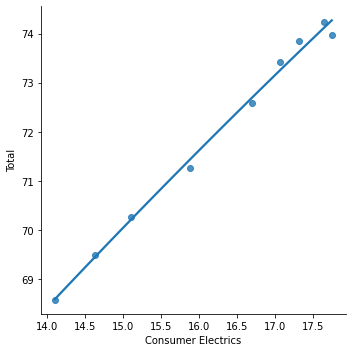

In [16]:
sns.lmplot(x ="Consumer Electrics", y ="Total", data = df_electronicstotal, order = 2, ci = None)

In [18]:
X = np.array(df_electronicstotal['Consumer Electrics']).reshape(-1, 1)
y = np.array(df_electronicstotal['Total']).reshape(-1, 1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [20]:
regr = LinearRegression()

regr.fit(X_train, y_train)

print(regr.score(X_test, y_test))

0.9778274131272606


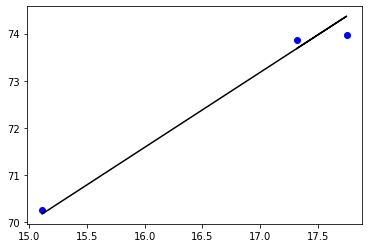

In [21]:
y_pred = regr.predict(X_test)

plt.scatter(X_test, y_test, color ='b')

plt.plot(X_test, y_pred, color ='k')

plt.show()